# Features Selection

https://www.superdatascience.com/courses/machine-learning-classification-bootcamp-in-python/module-4/logistic-regression-project-part-1
https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b

### 1. Loading data

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, math, subprocess
import datetime as dt

Loading data

In [63]:
df = pd.read_csv('features_creation.csv')
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')
df['product_first_sold_date'] = pd.to_datetime(df['product_first_sold_date'], errors='coerce')
df = df.dropna()
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gross_profit,margin_percentage,markup_percentage,high_profit_product
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-02-12,17.87,25.00,33.33,0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55,81.40,437.76,1
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61,86.13,620.77,1
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36,68.20,214.47,1
4,5,78,787,2017-01-10,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-10-08,1055.82,59.81,148.82,1


# Categorical Feature Engineering

### Product Class

In [64]:
df['product_class'].unique()

array(['medium', 'low', 'high'], dtype=object)

In [65]:
product_class_map = {'low': 1, 'medium': 2, 'high': 3}
df['product_class_label'] = df['product_class'].map(product_class_map)
df[['product_class', 'product_class_label']].head()

,product_class,product_class_label
0,medium,2
1,medium,2
2,low,1
3,medium,2
4,medium,2


Checking for the 'product class' and 'high_profit_product' distribution

In [66]:
df.groupby(['high_profit_product','product_class_label'])['product_class_label'].agg('count')

high_profit_product  product_class_label
0                    1                      2169
                     2                      7734
                     3                      3013
1                    1                       795
                     2                      6092
Name: product_class_label, dtype: int64

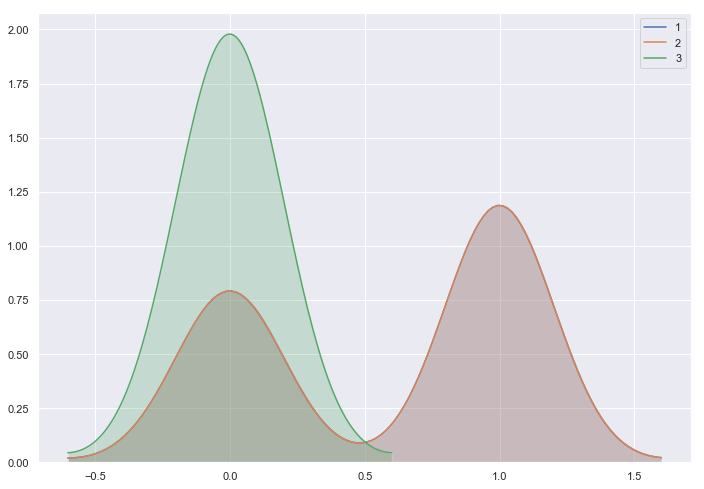

In [67]:
a = df['high_profit_product'][df['product_class_label']== 1].head()
b = df['high_profit_product'][df['product_class_label']== 2].head()
c = df['high_profit_product'][df['product_class_label']== 3].head()
sns.kdeplot(a, shade=True, bw=.2, label="1")
sns.kdeplot(b, shade=True, bw=.2, label="2")
sns.kdeplot(c, shade=True, bw=.2, label="3")
plt.legend();

### Product Size

In [68]:
product_size_map = {'small': 1, 'medium': 2, 'large': 3}
df['product_size_label'] = df['product_size'].map(product_size_map)
df[['product_size', 'product_size_label']].head()

,product_size,product_size_label
0,medium,2
1,large,3
2,medium,2
3,medium,2
4,large,3


Checking for the 'product size' and 'high_profit_product' distribution

In [69]:
df.groupby(['high_profit_product','product_size_label'])['product_size_label'].agg('count')

high_profit_product  product_size_label
0                    1                     2837
                     2                     8605
                     3                     1474
1                    2                     4385
                     3                     2502
Name: product_size_label, dtype: int64

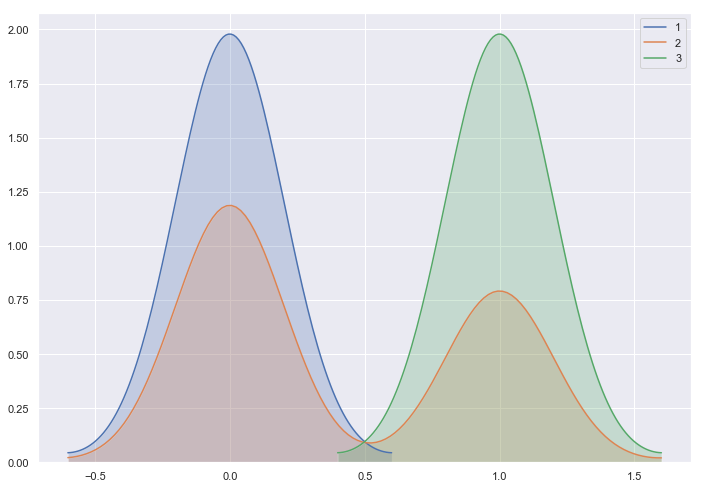

In [70]:
a = df['high_profit_product'][df['product_size_label']== 1].head()
b = df['high_profit_product'][df['product_size_label']== 2].head()
c = df['high_profit_product'][df['product_size_label']== 3].head()
sns.kdeplot(a, shade=True, bw=0.2, label="1")
sns.kdeplot(b, shade=True, bw=.2, label="2")
sns.kdeplot(c, shade=True, bw=.2, label="3")
plt.legend();

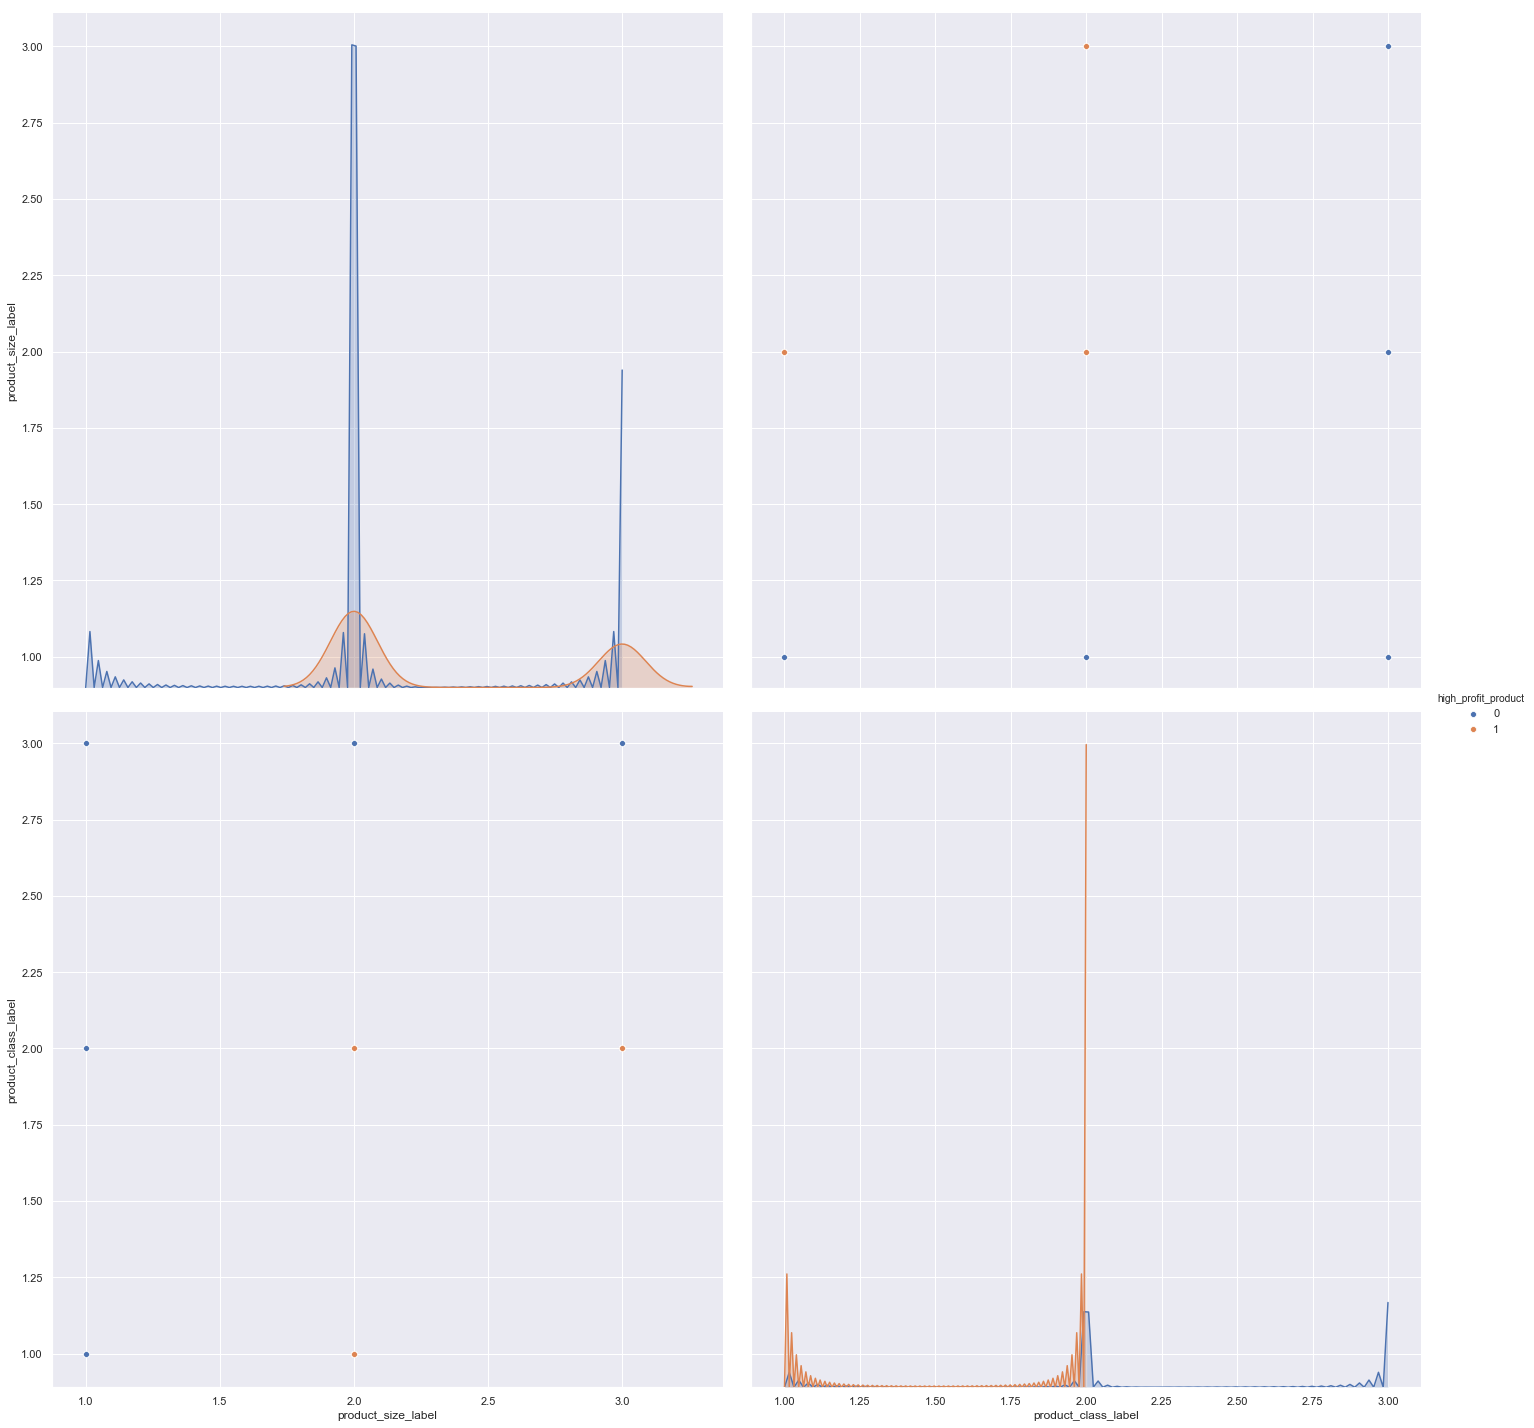

In [71]:
sns.pairplot(df,hue = 'high_profit_product',vars= ['product_size_label','product_class_label'], height=10)
plt.show()

### brand

In [72]:
df['brand'].unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B'], dtype=object)

In [73]:
solex = df['high_profit_product'][df['brand']== 'Solex'].head()
trek_bicycles = df['high_profit_product'][df['brand']== 'Trek Bicycles'].head()
ohm_cycles = df['high_profit_product'][df['brand']== 'OHM Cycles'].head()
norco_bicycles = df['high_profit_product'][df['brand']== 'Norco Bicycles'].head()
giant_bicycles = df['high_profit_product'][df['brand']== 'Giant Bicycles'].head()
wearea2b = df['high_profit_product'][df['brand']== 'WeareA2B'].head()

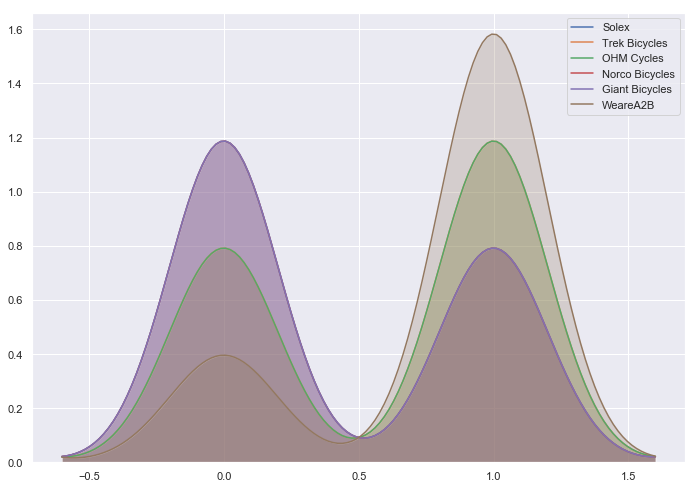

In [74]:
sns.kdeplot(solex, shade=True, bw=0.2, label="Solex")
sns.kdeplot(trek_bicycles, shade=True, bw=0.2, label="Trek Bicycles")
sns.kdeplot(ohm_cycles, shade=True, bw=0.2, label="OHM Cycles")
sns.kdeplot(norco_bicycles, shade=True, bw=0.2, label="Norco Bicycles")
sns.kdeplot(giant_bicycles, shade=True, bw=0.2, label="Giant Bicycles")
sns.kdeplot(wearea2b, shade=True, bw=0.2, label="WeareA2B")
plt.legend();

### online_order

In [75]:
df.online_order.describe()

count     19803
unique        2
top        True
freq      10097
Name: online_order, dtype: object

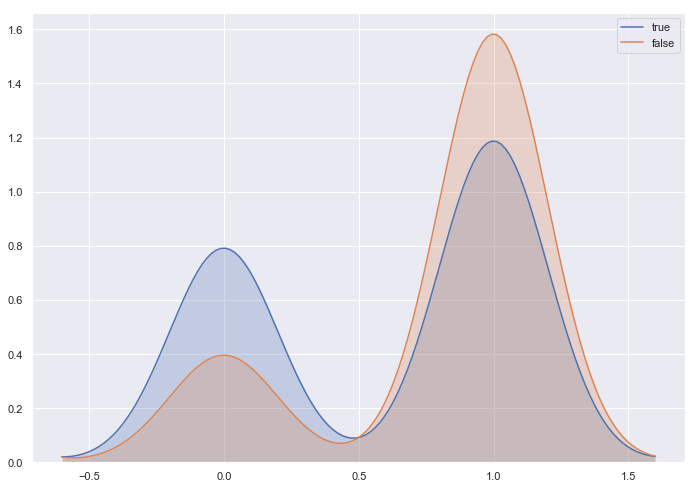

In [76]:
online_order_true = df['high_profit_product'][df['online_order']== True].head()
online_order_false = df['high_profit_product'][df['online_order']== False].head()
sns.kdeplot(online_order_true, shade=True, bw=0.2, label="true")
sns.kdeplot(online_order_false, shade=True, bw=0.2, label="false")
plt.legend();

In [77]:
online_order = {True: 1, False: 0}
df['online_order'] = df['online_order'].map(online_order)
df[['online_order']].head()

,online_order
0,0
1,1
2,0
3,0
4,1


### order_status

In [78]:
df.order_status.describe()

count        19803
unique           2
top       Approved
freq         19625
Name: order_status, dtype: object

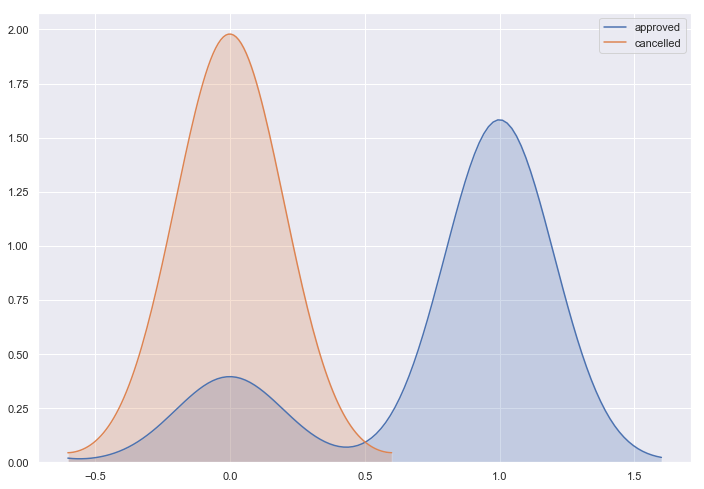

In [80]:
a = df['high_profit_product'][df['order_status']== 'Approved'].head()
b = df['high_profit_product'][df['order_status']== 'Cancelled'].head()
sns.kdeplot(a, shade=True, bw=0.2, label="approved")
sns.kdeplot(b, shade=True, bw=0.2, label="cancelled")
plt.legend();

In [81]:
order_status = {'Approved': 1, 'Cancelled': 0}
df['order_status'] = df['order_status'].map(order_status)
df[['order_status']].head()

,order_status
0,1
1,1
2,1
3,1
4,1


### 2. Feature Engineering

### a. Visualisation

### Heat map/ Corr:

Checking corr:

In [82]:
cor = df.corr()

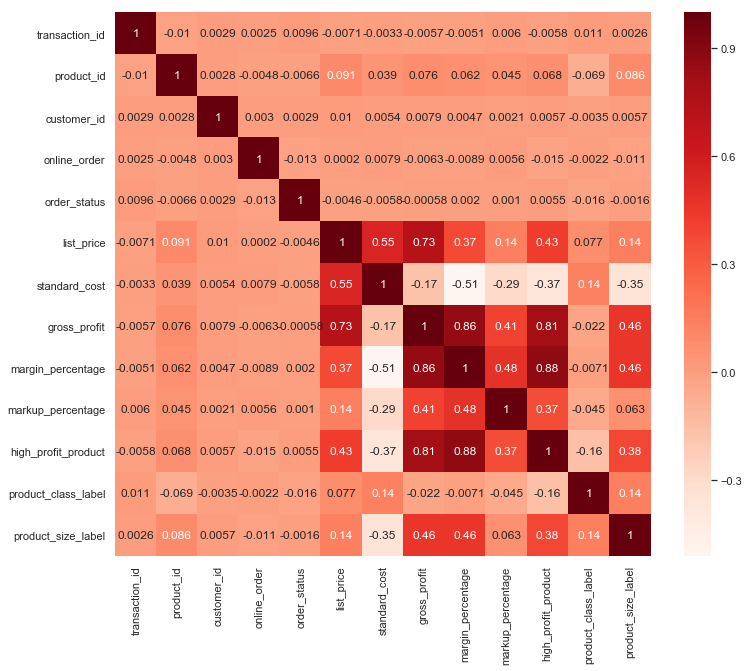

In [83]:
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [84]:
#Correlation with output variable
cor_target = abs(cor['high_profit_product'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

gross_profit           0.812649
margin_percentage      0.875362
high_profit_product    1.000000
Name: high_profit_product, dtype: float64

### Pairplot Density/ Distribution

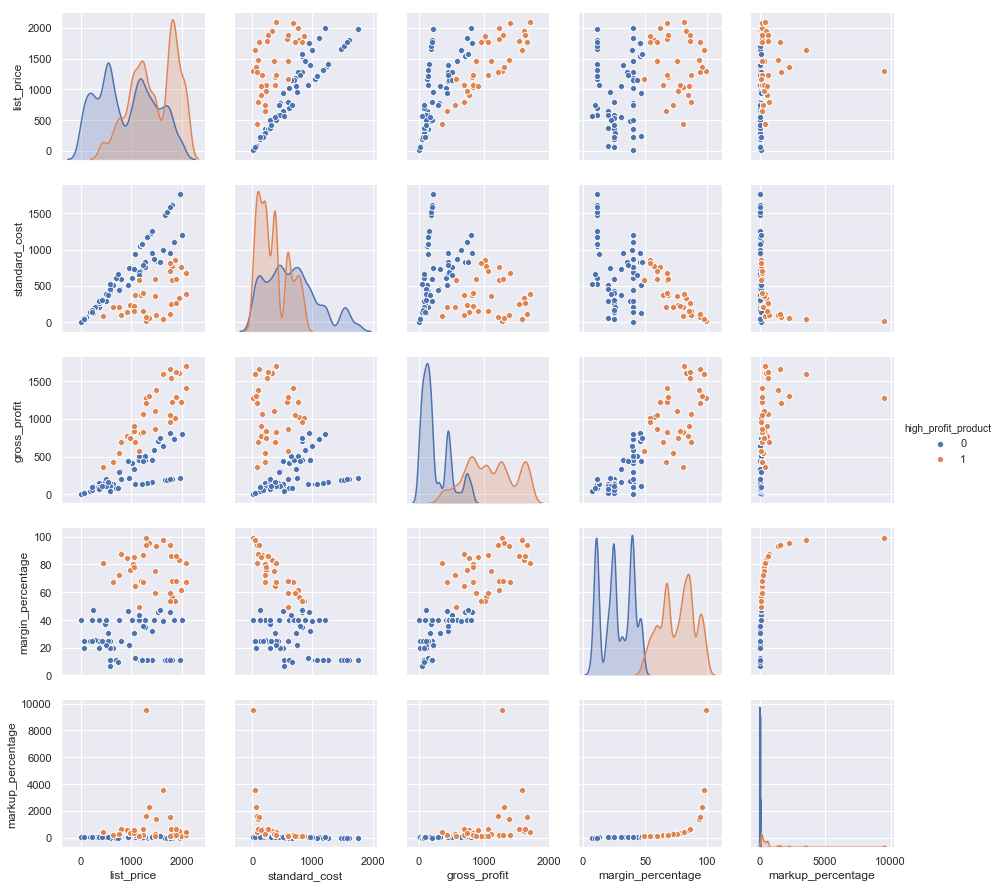

In [85]:
#Using Pearson Correlation
sns.pairplot(df,hue = 'high_profit_product',vars = ['list_price','standard_cost','gross_profit','margin_percentage','markup_percentage'])
plt.show()

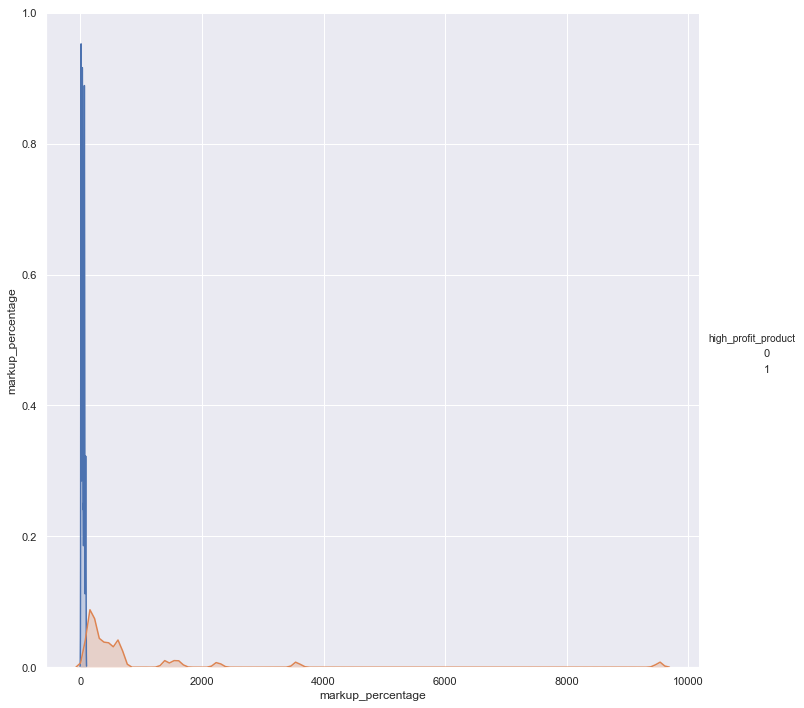

In [86]:
sns.pairplot(df,hue = 'high_profit_product',vars = ['markup_percentage'],height=10)
plt.show()

### ROC Curve

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import numpy as np
# loading dataset
data = df
feature_names = ['list_price','standard_cost','gross_profit','margin_percentage','markup_percentage','product_class_label','product_size_label']
X, y = data[feature_names], data.high_profit_product
y_ = y == 1

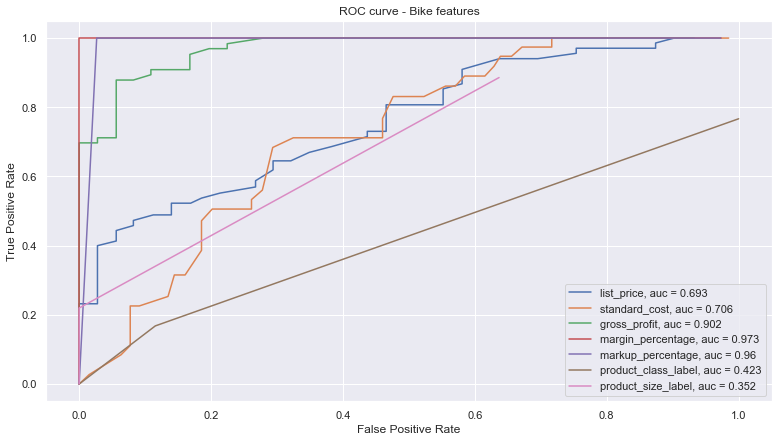

In [88]:
plt.figure(figsize=(13,7))
for col in range(X.shape[1]):
    tpr,fpr = [],[]
    for threshold in np.linspace(min(X.iloc[:,col]),max(X.iloc[:,col]),100):
        detP = X.iloc[:,col] < threshold
        tpr.append(sum(detP & y_)/sum(y_))# TP/P, aka recall
        fpr.append(sum(detP & (~y_))/sum((~y_)))# FP/N
        
    if auc(fpr,tpr) < .5:
        aux = tpr
        tpr = fpr
        fpr = aux
    plt.plot(fpr,tpr,label=feature_names[col] + ', auc = '\
                           + str(np.round(auc(fpr,tpr),decimals=3)))
plt.title('ROC curve - Bike features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### b. Univariate Filter Method

In [89]:
#from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np
feat_names = ['list_price', 'standard_cost','gross_profit', 'margin_percentage', 'markup_percentage']
X = df[feat_names]
Y = df.high_profit_product
rf = RandomForestRegressor()
rf.fit(X, Y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feat_names), 
             reverse=True))

C:\Users\My Computer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Features sorted by their score:
[(0.5, 'markup_percentage'), (0.5, 'margin_percentage'), (0.0, 'standard_cost'), (0.0, 'list_price'), (0.0, 'gross_profit')]


C:\Users\My Computer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\My Computer\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


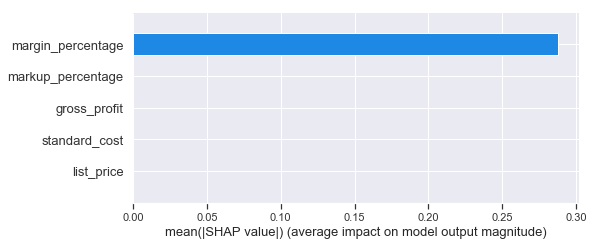

In [90]:
import xgboost
import shap
# load JS visualization code to notebook
shap.initjs()
# train XGBoost model
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

### Embedded methods

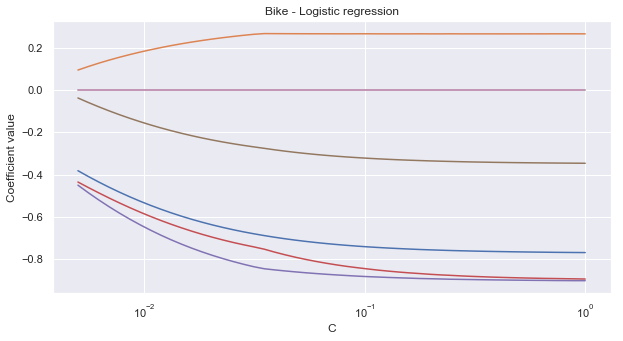

In [91]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.utils import check_random_state
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
rnd = check_random_state(1)
# set up dataset
n_samples = 3000
n_features = 7
feature_names = ['list_price','standard_cost','gross_profit','margin_percentage','markup_percentage','product_class_label','product_size_label']
X = df[feature_names]
y = df.high_profit_product
# l1 data (only 5 informative features)
X, y = datasets.make_classification(n_samples=n_samples,
                                        n_features=n_features, n_informative=5,
                                        random_state=1)
cs = np.logspace(-2.3, 0, 50)
coefs = []
for c in cs:
    clf = LogisticRegression(solver='liblinear',C=c,penalty='l1')
    # clf = LinearSVC(C=c,penalty='l1', loss='squared_hinge', dual=False, tol=1e-3)
    
    clf.fit(X,y)
    coefs.append(list(clf.coef_[0]))
    
coefs = np.array(coefs)
plt.figure(figsize=(10,5))
for i,col in enumerate(range(n_features)):
    plt.plot(cs,coefs[:,col])
plt.xscale('log')
plt.title('Bike - Logistic regression')
plt.xlabel('C')
plt.ylabel('Coefficient value')
plt.show()

In [92]:
print('initial coefs: ',coefs[0,:])
print('last coefs: ', coefs[-1,:])
#'list_price','standard_cost','gross_profit','margin_percentage','markup_percentage'
#'product_class_label','product_size_label'

initial coefs:  [-0.38179461  0.09579234  0.         -0.4355253  -0.45046618 -0.03663435
  0.        ]
last coefs:  [-0.77031957  0.26762281  0.         -0.8959187  -0.90375481 -0.34652129
  0.        ]


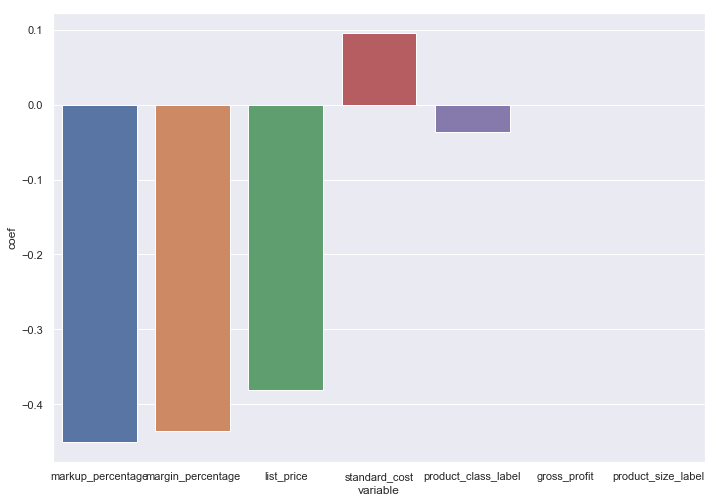

In [93]:
model_coefs = pd.DataFrame({'variable': feature_names,
                                'coef': coefs[0,:],
                                'abs_coef': np.abs(coefs[0,:])})

model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x="variable", y="coef", data=model_coefs, capsize= 11)
plt.show()

In [94]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gross_profit,margin_percentage,markup_percentage,high_profit_product,product_class_label,product_size_label
0,1,2,2950,2017-02-25,0,1,Solex,Standard,medium,medium,71.49,53.62,2012-02-12,17.87,25.00,33.33,0,2,2
1,2,3,3120,2017-05-21,1,1,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55,81.40,437.76,1,2,3
2,3,37,402,2017-10-16,0,1,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61,86.13,620.77,1,1,2
3,4,88,3135,2017-08-31,0,1,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36,68.20,214.47,1,2,2
4,5,78,787,2017-01-10,1,1,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-10-08,1055.82,59.81,148.82,1,2,3


### Converting features to binary:

In [95]:
df = pd.get_dummies(data=df,
                    columns=['product_class_label', 'product_size_label'],
                    prefix=['product_class_label', 'product_size_label'])
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gross_profit,margin_percentage,markup_percentage,high_profit_product,product_class_label_1,product_class_label_2,product_class_label_3,product_size_label_1,product_size_label_2,product_size_label_3
0,1,2,2950,2017-02-25,0,1,Solex,Standard,medium,medium,...,17.87,25.00,33.33,0,0,1,0,0,1,0
1,2,3,3120,2017-05-21,1,1,Trek Bicycles,Standard,medium,large,...,1702.55,81.40,437.76,1,0,1,0,0,0,1
2,3,37,402,2017-10-16,0,1,OHM Cycles,Standard,low,medium,...,1544.61,86.13,620.77,1,1,0,0,0,1,0
3,4,88,3135,2017-08-31,0,1,Norco Bicycles,Standard,medium,medium,...,817.36,68.20,214.47,1,0,1,0,0,1,0
4,5,78,787,2017-01-10,1,1,Giant Bicycles,Standard,medium,large,...,1055.82,59.81,148.82,1,0,1,0,0,0,1


In [96]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 23 columns):
transaction_id             19803 non-null int64
product_id                 19803 non-null int64
customer_id                19803 non-null int64
transaction_date           19803 non-null datetime64[ns]
online_order               19803 non-null int64
order_status               19803 non-null int64
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 19803 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null datetime64[ns]
gross_profit               19803 non-null float64
margin_percentage          19803 non-null float64
markup_percentage          19803 non-null float64
high_profit_product        19803 non-null int64
product_class_label_1      19803 non-null u

In [100]:
feature_cols = ['online_order', 'order_status','list_price', 'standard_cost', 'gross_profit', 'margin_percentage', 
                'markup_percentage', 'product_class_label_1','product_class_label_2','product_class_label_3',
                'product_size_label_1', 'product_size_label_2', 'product_size_label_3','high_profit_product']
df = df[feature_cols]
df.head()

,online_order,order_status,list_price,standard_cost,gross_profit,margin_percentage,markup_percentage,product_class_label_1,product_class_label_2,product_class_label_3,product_size_label_1,product_size_label_2,product_size_label_3,high_profit_product
0,0,1,71.49,53.62,17.87,25.00,33.33,0,1,0,0,1,0,0
1,1,1,2091.47,388.92,1702.55,81.40,437.76,0,1,0,0,0,1,1
2,0,1,1793.43,248.82,1544.61,86.13,620.77,1,0,0,0,1,0,1
3,0,1,1198.46,381.10,817.36,68.20,214.47,0,1,0,0,1,0,1
4,1,1,1765.30,709.48,1055.82,59.81,148.82,0,1,0,0,0,1,1


In [97]:
#https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b

In [98]:
#https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

In [101]:
df.to_csv('KPMG_train_test.csv')